In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.utils import shuffle

In [20]:
mean_1 = np.array([0.5,0.5])
mean_2 = np.array([3,4])

cov_1 = np.array([[1,0.5],[0.5,0.75]])
cov_2 = np.array([[1.5,0.1],[0.1,1]])

distri_1 = np.random.multivariate_normal(mean_1,cov_1,500)
distri_2 = np.random.multivariate_normal(mean_2,cov_2,500)

In [21]:
print(distri_1.shape, distri_2.shape)

(500, 2) (500, 2)


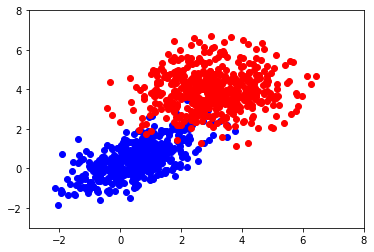

In [22]:
plt.figure()
plt.xlim(-3,8)
plt.ylim(-3,8)

plt.scatter(distri_1[:,0], distri_1[:,1],color='blue')
plt.scatter(distri_2[:,0], distri_2[:,1],color='red')
plt.show()



In [23]:
data = np.ones((1000,3)) # r = distri_1.shape[0] + distri_2.shape[0] && c = distri_1.shape[1] + 1
labels = np.zeros((1000,1))

data[:500,1:] = distri_1
data[500:,1:] = distri_2
labels[500:,:] = 1.0
               
print (data.shape, labels.shape)

(1000, 3) (1000, 1)


In [24]:
X,Y = shuffle(data, labels, random_state=0)

In [25]:
print(X[:5],Y[:5])

[[1.         1.85786197 3.1586446 ]
 [1.         1.76772864 2.85741559]
 [1.         1.94981473 0.20550225]
 [1.         5.67665835 5.38151426]
 [1.         1.29906318 3.70018825]] [[1.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [26]:
split = int(0.80*X.shape[0])

X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split,:]
Y_test = Y[split:,:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 3) (800, 1)
(200, 3) (200, 1)


## LOGISTIC REGRESSION

In [27]:
def hypothesis(x,theta):
    h = (x*theta).sum()
    return sigmod(h)

def sigmod(x):
    return 1.0 / (1.0 + np.exp(-1.0*x))

def get_error(y_true, x, theta):
    err = 0.0
    
    # m = no. of training samples
    m = x.shape[0]
    
    for ix in range(m):
        if y_true[ix] == 1:
            err += -1.0*np.log2(hypothesis(x[ix],theta))
        else:
            err += -1.0*np.log2(1-hypothesis(x[ix],theta))
    
    err /= m
    return err

def get_grads(y_true, x, theta):
    grads = np.zeros(theta.shape)
    
    m = x.shape[0]
    
    for ix in range(m):
        grads += (y_true[ix] - hypothesis(x[ix],theta))*x[ix]*-1
        
    grads = grads/m
    
    return grads

def gradient_descent(x, y_true, theta, lr = 0.1):
    
    err = get_error(y_true,x,theta)
    grads = get_grads(y_true,x,theta)
    
    theta = theta - lr*grads
    
    return err, theta

def predict(x,theta):
    prob = hypothesis(x,theta)
    
    if prob < 0.5:
        return 0
    else:
        return 1

def get_accuracy(x_test,y_test, theta):
    y_pred = []
    for ix in range(x_test.shape[0]):
        y_pred.append(predict(x_test[ix],theta))
    y_pred = np.array(y_pred).reshape(-1,1)
    
    return float((y_pred==y_test).sum())/y_test.shape[0]

In [28]:
loss = []
acc = []

theta = np.random.random(X_train.shape[1])
theta[0] = 0.0
print(theta)

[0.         0.6347062  0.63050993]


In [29]:
for ix in range(200):
    l,theta = gradient_descent(X_train,Y_train,theta,lr=0.5)
    acc.append(get_accuracy(X_test,Y_test,theta))
    loss.append(l)

In [30]:
loss[-10:]

[0.1598183643571086,
 0.15960473457659374,
 0.1593931309860137,
 0.15918352494008217,
 0.15897588833650134,
 0.15877019360306388,
 0.15856641368511762,
 0.15836452203338974,
 0.15816449259215226,
 0.15796629978772178]

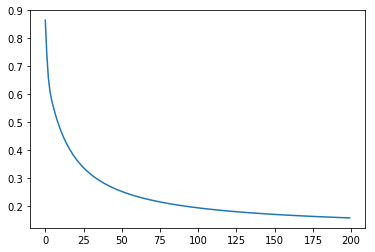

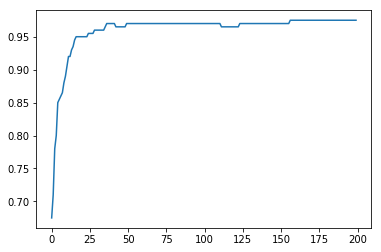

In [31]:
plt.figure(0)
plt.plot(loss)

plt.figure(1)
plt.plot(acc)